In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

import sys; sys.path.insert(0, '..') # add parent folder path where discrepancies folder is

from discrepancies import datasets, pool, pool2graph, evaluation

RANDOM_STATE = 42

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Get data and fit a pool of classifiers on it

X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(n_samples=1000, noise=0.3)
#X_train, X_test, y_train, y_test, scaler, feature_names, target_names = datasets.get_dataset(dataset='breast-cancer', n_samples=1000, noise=0.3)

pool1 = pool.BasicPool()
pool1 = pool1.fit(X_train, y_train)

In [12]:
pool1.predict(X_discr)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'X_discr' is not defined

In [16]:
p2g_k10_e2 = pool2graph.pool2graph(X_train, y_train, pool1, k=10)
p2g_k10_e2.fit(max_epochs=2)

# Get discrepancies dataset (i.e. where the pool produce discrepancies according to the pool2graph)
X_discr, y_discr = p2g_k10_e2.get_discrepancies_dataset()

# Instantiate explainers - put them in a list
xpl_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_leaf_nodes=10)
xpl_rfc = RandomForestClassifier()

xpls = [xpl_tree, xpl_rfc]

# Compare estimators' goodness of fit
fit_scores, xpl_estimators = evaluation.compare_fit_explainer(xpls, X_discr, y_discr)

# Compare estimators' fidelity to pool's discrepancies (drawing new samples)
fidelity_scores = evaluation.compare_fidelity_explainer(xpl_estimators, p2g_k10_e2, X_train, n=5000)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:72: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  _edges = np.vstack({tuple(row) for row in _edges})
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

NameError: name 'tree' is not defined

In [298]:
fit_scores

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)",RandomForestClassifier()
fit_time,0.01,0.27
score_time,0.01,0.02
test_accuracy,0.79,0.91
train_accuracy,0.83,1.00
test_balanced_accuracy,0.77,0.90
train_balanced_accuracy,0.82,1.00
test_f1_score_non_discrepancies,0.71,0.88
train_f1_score_non_discrepancies,0.77,1.00
test_f1_score_discrepancies,0.83,0.92
train_f1_score_discrepancies,0.87,1.00


In [299]:
fidelity_scores

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)",RandomForestClassifier()
accuracy_discrepancy,0.85,0.97
balanced_accuracy_discrepancy,0.87,0.96
f1-score_discrepancies,0.80,0.95
f1-score_NON_discrepancies,0.89,0.98


/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:236: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  G_discrepancies_components = np.array(G_discrepancies_components)[order]
../discrepancies/pool2graph.py:413: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coords_lcluster[DISCR_ground_truth==True].plot(kind='scatter', x=0, y=1, c='cluster', marker='d', colormap='winter', ax=ax)


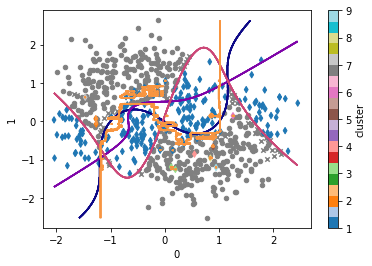

In [300]:
p2g_k10_e2.plot_domain()

### Scenario

- Global: utiliser un modèle pour prédire la susceptibilité d'un point d'être dans une zone de discrepancy
- Global: comprendre les zones de discrepancies
- Local: comprendre la variabilité des explications pour une prédiction (regarding what has been learnt/what can be learnt)
- Local: produire des interval-counterfactuals

- Explain a decision boundary of a classifier g against the discrepancies of the pool

### Les discrepancies sont plus difficiles à prédire que les non-discrepancies.
Hypothèse : les zones de discrepancies sont généralement "atomisées" en clusters. Leur affectation à un label unique complique largement la tâche d'apprentissage par rapport aux zones de non-discrepancies qui sont généralement de vaste zones contigues de l'espace.

A tester : entrainer un modèle avec comme targets: {non-discrepancies, cluster_discrepancy_1, cluster_discrepancy_2, ...}

L'évaluation peut se faire (1) soit simplement en aggrégeant tous les labels de discrepancies (2) soit en les dissociants (il faut alors passer par le graph pour y intégrer chaque test point et décider de son cluster de discrepancy. 

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


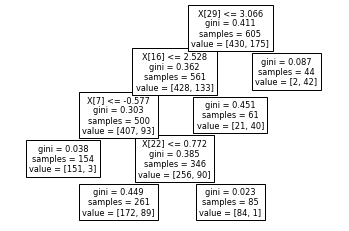

In [207]:
xpl_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_leaf_nodes=5)
xpl_tree = xpl_tree.fit(X_discr, y_discr)
txt = evaluation.plot_tree(xpl_tree)

## Fidelity at epoch = 0 vs epoch = convergence

In [259]:
p2g_k10_e0 = pool2graph.pool2graph(X_train, y_train, pool1, k=10)
p2g_k10_e0.fit(max_epochs=0)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:72: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  _edges = np.vstack({tuple(row) for row in _edges})
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

In [260]:
# Get discrepancies dataset (i.e. where the pool produce discrepancies according to the pool2graph)
X_discr, y_discr = p2g_k10_e0.get_discrepancies_dataset()

# Instantiate explainers - put them in a list
xpl_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_leaf_nodes=10)
xpl_rfc = RandomForestClassifier()

xpls = [xpl_tree, xpl_rfc]

# Compare estimators' goodness of fit
fit_scores, xpl_estimators = evaluation.compare_fit_explainer(xpls, X_discr, y_discr)

# Compare estimators' fidelity to pool's discrepancies (drawing new samples)
fidelity_scores = evaluation.compare_fidelity_explainer(xpl_estimators, p2g_k10_e0, X_train, n=50000)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
fit_scores

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)",RandomForestClassifier()
fit_time,0.00,0.21
score_time,0.00,0.02
test_accuracy,0.88,0.91
train_accuracy,0.96,1.00
test_balanced_accuracy,0.70,0.66
train_balanced_accuracy,0.88,1.00
test_f1_score_non_discrepancies,0.93,0.95
train_f1_score_non_discrepancies,0.98,1.00
test_f1_score_discrepancies,0.48,0.46
train_f1_score_discrepancies,0.84,1.00


In [262]:
fidelity_scores

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)",RandomForestClassifier()
accuracy_discrepancy,0.89,0.95
balanced_accuracy_discrepancy,0.76,0.82
f1-score_discrepancies,0.57,0.77
f1-score_NON_discrepancies,0.94,0.97


/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


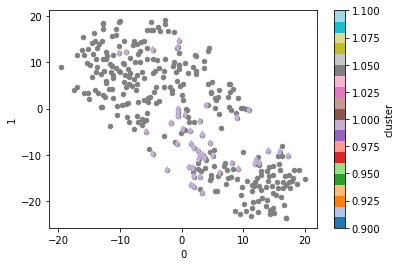

In [264]:
p2g_k10_e0.plot_domain()

### Fit one tree by cluster of discrepancies

In [272]:
p2g = pool2graph.pool2graph(X_train, y_train, pool1, k=10)
p2g.fit(max_epochs=2)

# Get discrepancies dataset (i.e. where the pool produce discrepancies according to the pool2graph)
X_discr, y_discr = p2g.get_discrepancies_dataset(binarize=False)

# Instantiate explainers - put them in a list
xpl_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_leaf_nodes=10)
xpl_rfc = RandomForestClassifier()

xpls = [xpl_tree, xpl_rfc]

# Compare estimators' goodness of fit
#fit_scores, xpl_estimators = evaluation.compare_fit_explainer(xpls, X_discr, y_discr)

# Compare estimators' fidelity to pool's discrepancies (drawing new samples)
#fidelity_scores = evaluation.compare_fidelity_explainer(xpl_estimators, p2g, X_train, n=5000)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:72: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  _edges = np.vstack({tuple(row) for row in _edges})
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

In [313]:
X_discr, y_discr = p2g_k10_e2.get_discrepancies_dataset(binarize=False)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:236: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  G_discrepancies_components = np.array(G_discrepancies_components)[order]


In [126]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from skrules import SkopeRules

p2g = pool2graph.pool2graph(X_train, y_train, pool1, k=10)
p2g.fit(max_epochs=0)

X_discr, y_discr = p2g.get_discrepancies_dataset(binarize=False)

xpl = []

for i in y_discr.unique()[:3]:

    targets = ['rest', 'discrepancy area #'+str(i)]

    y_tmp = y_discr.copy()
    ind =  y_discr[y_discr==i].index
    y_tmp[ind] = 1
    ind =  y_discr[y_discr!=i].index
    y_tmp[ind] = 0

    xpl_rules = SkopeRules(max_depth_duplication=2,
                 n_estimators=100,
                 precision_min=0.5,
                 recall_min=0.5,
                 feature_names=feature_names)

    xpl_rules = xpl_rules.fit(X_discr, y_tmp==1)
    xpl.append(xpl_rules)

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:72: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  _edges = np.vstack({tuple(row) for row in _edges})
/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object

/opt/miniconda3/envs/autogluon/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../discrepancies/pool2graph.py:236: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  G_discrepancies_components = np.array(G_discrepancies_components)[order]
[]


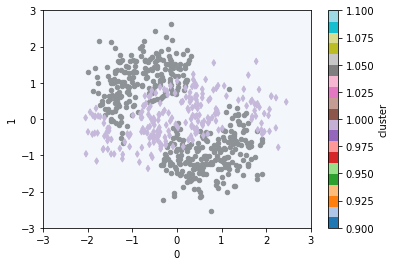

In [129]:
r = 1
n_rules = len(xpl_rules.rules_)
n_rules = 2

xpl_rules = xpl[r]

p2g_k10_e2.plot_domain(n_cluster=r)

xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
Z = xpl_rules.predict_top_rules(np.c_[xx.ravel(), yy.ravel()], n_rules=n_rules)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.2)

print(xpl_rules.rules_)

In [ ]:
xpl_tree = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, max_leaf_nodes=5)
xpl_tree = xpl_tree.fit(X_discr, y_discr)
txt = evaluation.plot_tree(xpl_tree)